<a href="https://colab.research.google.com/github/littlecanargie/EpidemicModeling/blob/main/20210128_Practice_3_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machinery (takes some time)

## Base packages

In [1]:
libraries = c("dplyr", "magrittr", "tidyr", "ggplot2", "readxl")  
for(x in libraries) { library(x, character.only=TRUE, warn.conflicts=FALSE, quietly=TRUE) }

install.packages("zoo"); library("zoo")

R.Version()$version.string

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "R version 4.0.3 (2020-10-10)"

In [2]:
# Step 1: install CmdStanR and only the packages that it directly depends on.
install.packages('versions')
library(versions)
# Install package CmdStanR from GitHub
library(devtools)
if(!require(cmdstanr)){
  devtools::install_github("stan-dev/cmdstanr", dependencies=c("Depends", "Imports"))
  library(cmdstanr)
}
# Step 2: download and untar the CmdStan binary for Google Colab instances
## Install CmdStan binaries
if (!file.exists("cmdstan-2.23.0.tgz")) {
  system("wget https://github.com/stan-dev/cmdstan/releases/download/v2.23.0/colab-cmdstan-2.23.0.tar.gz", intern=T)
  system("tar zxf colab-cmdstan-2.23.0.tar.gz", intern=T)
}
list.files("cmdstan-2.23.0")
# Step 3: Register the CmdStan install location
## Set cmdstan_path to CmdStan installation
set_cmdstan_path("cmdstan-2.23.0")
print_file <- function(file, nlines=-1L) {
  cat(paste(readLines(file, n=nlines), "\n", sep=""), sep="")
}
# will be used for postprocessing
if (!require("devtools")) {
  install.packages("devtools")
}
devtools::install_github("stan-dev/bayesplot")

library(posterior)
library(bayesplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis

Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



posterior  (NA -> 2c0a2f111...) [GitHub]
checkmate  (NA -> 2.0.0       ) [CRAN]
abind      (NA -> 1.4-5       ) [CRAN]
data.table (NA -> 1.13.6      ) [CRAN]


checkmate (NA -> 2.0.0) [CRAN]
abind     (NA -> 1.4-5) [CRAN]


Installing 2 packages: checkmate, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpHAAPq2/remotes3d3d900662/stan-dev-posterior-2c0a2f1/DESCRIPTION’
─  preparing ‘posterior’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘posterior_0.1.3.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 3 packages: checkmate, abind, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'posterior' from a github remote, the SHA1 (2c0a2f11) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpHAAPq2/remotes3d15697b/stan-dev-cmdstanr-ff832c8/DESCRIPTION’
─  preparing ‘cmdstanr’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘cmdstanr_0.3.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.3.0.9000

- Online documentation and vignettes at mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



character(0)

[1] "bin"                "examples"           "install-tbb.bat"   
 [4] "Jenkinsfile"        "lib"                "LICENSE"           
 [7] "make"               "makefile"           "README.md"         
[10] "runCmdStanTests.py" "src"                "stan"              
[13] "test-all.sh"

CmdStan path set to: /content/cmdstan-2.23.0




brio     (1.1.0 -> 1.1.1) [CRAN]
withr    (2.4.0 -> 2.4.1) [CRAN]
plyr     (NA    -> 1.8.6) [CRAN]
reshape2 (NA    -> 1.4.4) [CRAN]
ggridges (NA    -> 0.5.3) [CRAN]


Installing 5 packages: brio, withr, plyr, reshape2, ggridges

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpHAAPq2/remotes3d724abdb4/stan-dev-bayesplot-665c687/DESCRIPTION’
─  preparing ‘bayesplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘bayesplot_1.8.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is posterior version 0.1.3

This is bayesplot version 1.8.0.9000

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting


Attaching package: ‘bayesplot’


The following object is masked from ‘package:posterior’:

    rhat




# Loading the data

In [3]:
# loading datafile from GoogleDrive
## https://drive.google.com/file/d/1gWnErS7eKKbqfzfVI1CFpYtPgOm1RrXl/view?usp=sharing
system("gdown --id 1gWnErS7eKKbqfzfVI1CFpYtPgOm1RrXl")
list.files()

[1] "cmdstan-2.23.0"              "colab-cmdstan-2.23.0.tar.gz"
[3] "data_Taiwan.xlsx"            "sample_data"

In [4]:
datafilename = "data_Taiwan.xlsx"
df_twn = read_excel(datafilename, na=c("NA",""))
(nrow(df_twn))
df_twn

[1] 885

ID,Age,Gender,Nationality,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,SymptomsLeft,SymptomsRight,TestLeft,TestRight,Confirm,Symptoms,Source-1,Source-2,Remarks
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>
1,50+,F,Taiwan,Lives-works-studies in Wuhan,NA,NA,2020-01-20,2020-01-11,NA,2020-01-20 12:00:00,NA,2020-01-21 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/pVg_jRVvtHhp94C6GShRkQ?typeid=158,NA,NA
2,50+,F,China,International travel,NA,NA,2020-01-21,2020-01-23,NA,2020-01-23 12:00:00,NA,2020-01-24 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/xzPuzBOQiW0Gjw1MfyNKnw?typeid=158,NA,NA
3,50+,M,Taiwan,International travel,NA,NA,2020-01-21,2020-01-20,NA,2020-01-23 12:00:00,NA,2020-01-24 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/xzPuzBOQiW0Gjw1MfyNKnw?typeid=158,NA,NA
4,50+,F,Taiwan,International travel,Travel to Wuhan,2020-01-13,2020-01-15,2020-01-22,NA,2020-01-25 12:00:00,NA,2020-01-26 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/ium6WF2Y4-QJUIu2ho9dpQ?typeid=158,NA,NA
5,50+,F,Taiwan,Lives-works-studies in Wuhan,NA,2019-10-21,2020-01-20,2020-01-25,NA,2020-01-25 12:00:00,NA,2020-01-27 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/3-5SDzWWHj91fu_NLgS0gg?typeid=158,NA,NA
6,70+,F,China,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-25,NA,2020-01-25 12:00:00,NA,2020-01-28 12:00:00,NA,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NA,NA
7,70+,F,China,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-23,NA,2020-01-25 12:00:00,NA,2020-01-28 12:00:00,NA,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NA,NA
8,52,M,Taiwan,Local,Household,2020-01-20,2020-01-25,2020-01-26,NA,2020-01-26 12:00:00,NA,2020-01-28 12:00:00,NA,https://www.cdc.gov.tw/En/Bulletin/Detail/3-5SDzWWHj91fu_NLgS0gg?typeid=158,ChenJian20_JAMAIntMed,NA
9,40+,F,Taiwan,Local,Household,2020-01-12,2020-01-26,2020-01-27,NA,2020-01-28 12:00:00,NA,2020-01-30 12:00:00,NA,https://www.taiwannews.com.tw/en/news/3867321,ChenJian20_JAMAIntMed,NA


In [5]:
# there are several cases which are non-informative at all
## we will disregard them
df_twn %>%
    select(-starts_with("Source")) %>%
    ## here it is the same manupilations as above for Japan
    mutate(across(c("SymptomsRight", "SymptomsLeft", "ExposureRight", "ExposureLeft", "Confirm"), ~as.Date(.))) %>%
    # # to double-check that at least one of Symptoms dates or one of Exposure dates is not NA
    filter(is.na(SymptomsLeft) & is.na(SymptomsRight) & is.na(ExposureLeft) & is.na(ExposureRight))

ID,Age,Gender,Nationality,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,SymptomsLeft,SymptomsRight,TestLeft,TestRight,Confirm,Symptoms,Remarks
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<dttm>,<date>,<chr>,<chr>
40,70+,F,Taiwan,International travel,Diamond Princess,NA,NA,NA,NA,NA,NA,NA,NA,NA
380,20+,M,Taiwan,Local,NA,NA,NA,NA,NA,2020-04-06,NA,2020-04-09,NA,NA
386,20+,M,Taiwan,Local,Contact with a case,NA,NA,NA,NA,NA,NA,2020-04-12,NA,NA
470,20+,M,Philippines,International travel,Crew,NA,NA,NA,NA,2020-07-30,NA,2020-08-01,無症狀,NA


In [6]:
df_twn %<>%
    # remove columns with Source information and about Symptoms
    select(-starts_with("Source"),-starts_with("Remark"),-Symptoms) %>%
    ## here it is the same manupilations as above for Japan
    mutate(across(c("SymptomsRight", "SymptomsLeft", "ExposureRight", "ExposureLeft", "Confirm"), ~as.Date(.))) %>%
    # # to double-check that at least one of Symptoms dates or one of Exposure dates is not NA
    filter((!is.na(SymptomsLeft) | !is.na(SymptomsRight) | !is.na(ExposureLeft) | !is.na(ExposureRight))) %>%
    mutate(
           # if SymptomsRight is NA, then SymptomsRight = SymptomsLeft + 1 day
           SymptomsRight = if_else(is.na(SymptomsRight), SymptomsLeft, SymptomsRight),
           # if ExposureRight is NA or larger that SymptomsRight, then ExposureRight = SymptomsRight 
           ExposureRight = if_else((ExposureRight>=SymptomsRight) | is.na(ExposureRight), SymptomsRight, ExposureRight), 
           # if ExposureLeft is not NA, and it is larger than SymptomsLeft, then SymptomsLeft = ExposureLeft
           SymptomsLeft = if_else(ExposureLeft <= SymptomsLeft | is.na(ExposureLeft), SymptomsLeft, ExposureLeft)
    ) 
(nrow(df_twn))
df_twn

[1] 881

ID,Age,Gender,Nationality,ExposureType,ExposureDetail,ExposureLeft,ExposureRight,SymptomsLeft,SymptomsRight,TestLeft,TestRight,Confirm
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<date>,<date>,<dttm>,<dttm>,<date>
1,50+,F,Taiwan,Lives-works-studies in Wuhan,NA,NA,2020-01-11,2020-01-11,2020-01-11,2020-01-20 12:00:00,NA,2020-01-21
2,50+,F,China,International travel,NA,NA,2020-01-21,2020-01-23,2020-01-23,2020-01-23 12:00:00,NA,2020-01-24
3,50+,M,Taiwan,International travel,NA,NA,2020-01-20,2020-01-20,2020-01-20,2020-01-23 12:00:00,NA,2020-01-24
4,50+,F,Taiwan,International travel,Travel to Wuhan,2020-01-13,2020-01-15,2020-01-22,2020-01-22,2020-01-25 12:00:00,NA,2020-01-26
5,50+,F,Taiwan,Lives-works-studies in Wuhan,NA,2019-10-21,2020-01-20,2020-01-25,2020-01-25,2020-01-25 12:00:00,NA,2020-01-27
6,70+,F,China,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-25,2020-01-25,2020-01-25 12:00:00,NA,2020-01-28
7,70+,F,China,Lives-works-studies in Wuhan,NA,NA,2020-01-22,2020-01-23,2020-01-23,2020-01-25 12:00:00,NA,2020-01-28
8,52,M,Taiwan,Local,Household,2020-01-20,2020-01-25,2020-01-26,2020-01-26,2020-01-26 12:00:00,NA,2020-01-28
9,40+,F,Taiwan,Local,Household,2020-01-12,2020-01-26,2020-01-27,2020-01-27,2020-01-28 12:00:00,NA,2020-01-30


In [ ]:
df_twn %<>%
  select(ID, Gender, Nationality, ExposureType, ExposureDetail, SymptomsLeft, Confirm) %>%
  rename(Onset = SymptomsLeft)
df_twn

In [ ]:
# plotting
options(repr.plot.width=12, repr.plot.height=6)
df_twn %>% mutate(ExposureType = factor(ExposureType, levels=c("Local", "International travel"))) %>%
  ggplot(aes(Onset)) + 
  geom_bar(aes(fill=ExposureType), color="grey", size=.1) + 
  scale_fill_manual(values=c("#fdae61", "#4d4d4d")) +
  theme_bw() + 
  labs(x = "Date of illness onset", y="New cases", title="Taiwan") + 
  scale_x_date(date_labels="%m/%d",date_breaks  = "14 days", expand = c(0, 0)) 

In [54]:
df_twn_rm <- df_twn %>% 
  filter(ExposureType == "Local") %>% 
  filter(Onset <= Confirm) %>% filter(!is.na(Onset)) %>% filter(!is.na(Confirm)) %>% mutate(Gap = Confirm - Onset)

# Stan program
stan_code = "data {
  int<lower = 1> N; // number of records
  int<lower = 0> gap[N]; // Coarse delay gap in days
}

parameters {
  vector<lower=0, upper=1>[N] onset_time;
  vector<lower=0, upper=1>[N] confirmation_time;

  real<lower=0> mean_delay;
  real<lower=0> sd_delay; 
}

transformed parameters {
  real shape_delay = square(mean_delay / sd_delay);
  real rate_delay = mean_delay / square(sd_delay);

  vector[N] true_gap;
  for (i in 1:N)  
    if (gap[i] >= 1) 
      true_gap[i] = gap[i] + confirmation_time[i] - onset_time[i];
    else
      true_gap[i] = gap[i] + abs(confirmation_time[i] - onset_time[i]);
}

model {
  // priors
  mean_delay ~ normal(5.0, 5.0);
  sd_delay ~ cauchy(0.0, 5.0);

  true_gap ~ gamma(shape_delay, rate_delay);  
}"
stan_file = write_stan_file(stan_code)


In [55]:
# if I consider all cases imported + local
data_list = list(gap = as.numeric(df_twn_rm$Gap), N = nrow(df_twn_rm))
data_file = tempfile(fileext = ".json")
write_stan_json(data_list, data_file)

# Compile example model
mod = cmdstan_model(stan_file)

# Condition on data
## seed number is used for possible reproducibility
fit = mod$sample(data = data_file, iter_sampling=1000, iter_warmup=500, chains=3, seed=123)

output = fit$summary(c("mean_delay", "sd_delay"), ~quantile(.x, probs = c(0.5, 0.025, 0.975))) %>% as.data.frame
names(output) = c("variable", "median", "q2.5", "q97.5")
options(digits = 3)
output

Compiling Stan program...



Running MCMC with 3 sequential chains...

Chain 1 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 

Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your mod

Chain 1 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 1 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 1 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 1 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 1 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 1 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 1 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 1 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 1 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 1 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 1 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 1 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 1 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 1 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 1 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 1 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 1 finished in 1.4 seconds.
Chain 2 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 

Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your mod

Chain 2 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 2 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 2 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 2 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 2 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 2 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 2 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 2 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 2 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 2 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 2 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 2 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 2 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 2 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 2 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 2 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 2 finished in 1.6 seconds.
Chain 3 Iteration:    1 / 1500 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 

Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: gamma_lpdf: Shape parameter is 0, but must be > 0! (in '/tmp/RtmpHAAPq2/model-3d819a5fe.stan', line 31, column 2 to column 44)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your mod

Chain 3 Iteration:  100 / 1500 [  6%]  (Warmup) 
Chain 3 Iteration:  200 / 1500 [ 13%]  (Warmup) 
Chain 3 Iteration:  300 / 1500 [ 20%]  (Warmup) 
Chain 3 Iteration:  400 / 1500 [ 26%]  (Warmup) 
Chain 3 Iteration:  500 / 1500 [ 33%]  (Warmup) 
Chain 3 Iteration:  501 / 1500 [ 33%]  (Sampling) 
Chain 3 Iteration:  600 / 1500 [ 40%]  (Sampling) 
Chain 3 Iteration:  700 / 1500 [ 46%]  (Sampling) 
Chain 3 Iteration:  800 / 1500 [ 53%]  (Sampling) 
Chain 3 Iteration:  900 / 1500 [ 60%]  (Sampling) 
Chain 3 Iteration: 1000 / 1500 [ 66%]  (Sampling) 
Chain 3 Iteration: 1100 / 1500 [ 73%]  (Sampling) 
Chain 3 Iteration: 1200 / 1500 [ 80%]  (Sampling) 
Chain 3 Iteration: 1300 / 1500 [ 86%]  (Sampling) 
Chain 3 Iteration: 1400 / 1500 [ 93%]  (Sampling) 
Chain 3 Iteration: 1500 / 1500 [100%]  (Sampling) 
Chain 3 finished in 1.5 seconds.

All 3 chains finished successfully.
Mean chain execution time: 1.5 seconds.
Total execution time: 4.8 seconds.


variable,median,q2.5,q97.5
<chr>,<dbl>,<dbl>,<dbl>
mean_delay,8.40,6.78,10.45
sd_delay,7.23,5.56,9.75


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



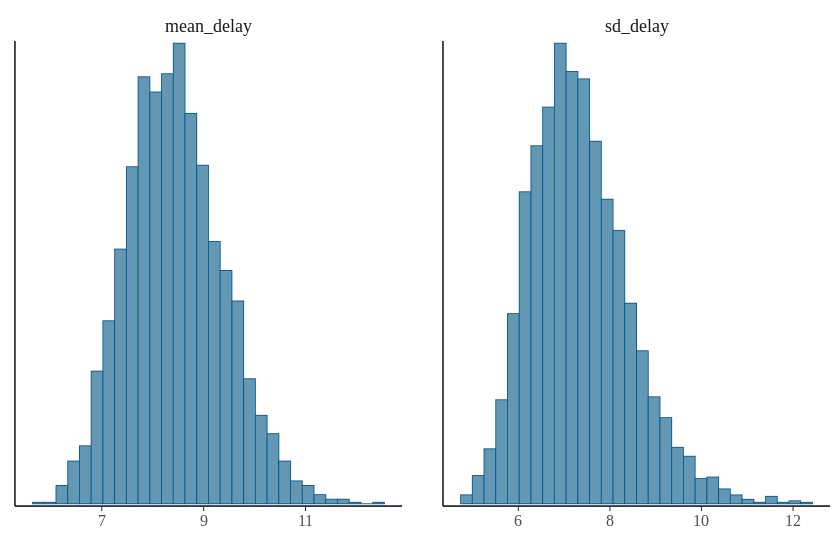

In [56]:
options(repr.plot.width=7, repr.plot.height=4.5)
mcmc_hist(fit$draws(c("mean_delay", "sd_delay")))

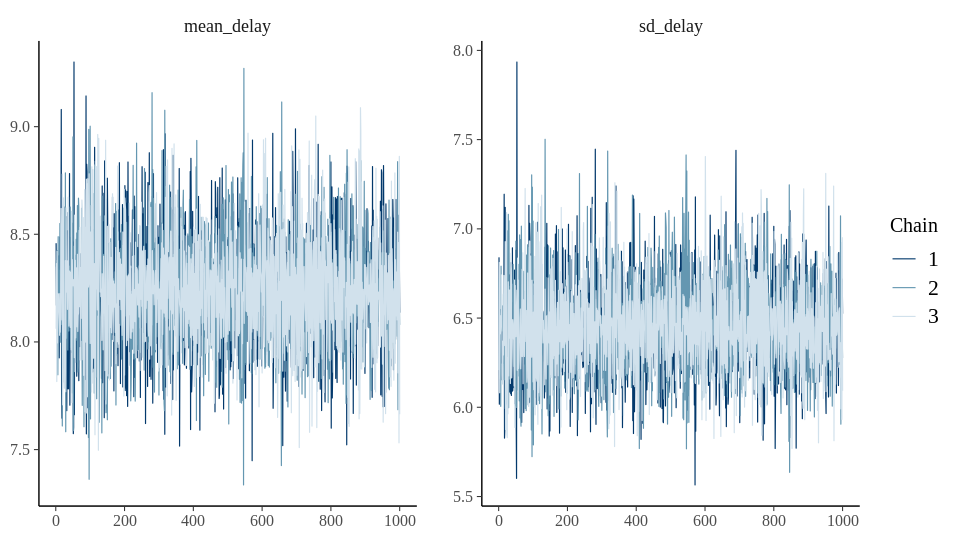

In [51]:
options(repr.plot.width=8, repr.plot.height=4.5)
mcmc_trace(fit$draws(), pars = c("mean_delay", "sd_delay"))

In [57]:
df_twn_rm

ID,Gender,Nationality,ExposureType,ExposureDetail,Onset,Confirm,Gap
<dbl>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<drtn>
8,M,Taiwan,Local,Household,2020-01-26,2020-01-28,2 days
9,F,Taiwan,Local,Household,2020-01-27,2020-01-30,3 days
19,M,Taiwan,Local,Contact with a case,2020-01-27,2020-02-15,19 days
21,F,Taiwan,Local,Household,2020-02-06,2020-02-17,11 days
22,M,Taiwan,Local,Household,2020-01-28,2020-02-17,20 days
23,F,Taiwan,Local,Household,2020-02-03,2020-02-19,16 days
24,F,Taiwan,Local,NA,2020-01-22,2020-02-19,28 days
25,F,Taiwan,Local,Household,2020-01-28,2020-02-21,24 days
27,M,Taiwan,Local,Contact with a case,2020-02-05,2020-02-23,18 days


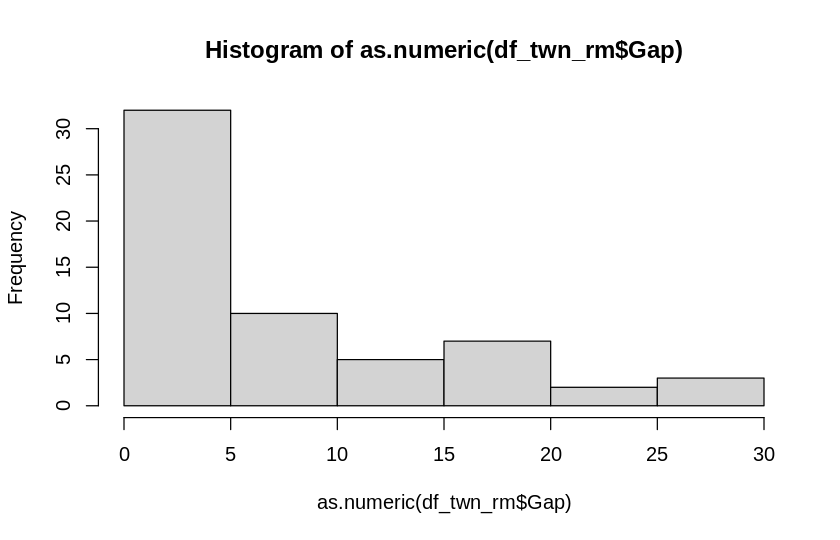

In [60]:
hist(as.numeric(df_twn_rm$Gap))